In [21]:
import numpy as np
import matplotlib.pyplot as plt

def convTimeInvariant(x, kernel, y, add = False):
    ''' Convolution of a time invariant kernel with a time series

    Parameters
    ----------
    x : 1D numpy array
        The time series to convolve
    kernel : 1D numpy array
        The time invariant kernel
    y : 1D numpy array
        The output array with the same size as x + len(kernel) - 1
    add : bool, optional
        If True, add the result to y, otherwise overwrite y
    '''

    # get and check the size of the input
    nt = x.shape[0]
    ntau = kernel.shape[0]
    if y.shape[0] != nt + ntau - 1:
        raise ValueError('y has the wrong size')

    # clear y if not add
    if not add:
        y[:] = 0.

    # perform the convolution
    for it in range(nt):
        for itau in range(ntau):
            y[it + itau] += kernel[itau] * x[it]


def convTimeVariant(x, kernel, kernelT, y, add = False):
    ''' Convolution of a time variant kernel with a time series. The kernel is 
        represented by a coarse grid in time, and a linear interpolation is used 
        to evaluate the kernel at the time of the convolution.

    Parameters
    ----------
    x : 1D numpy array
        The time series to convolve
    kernel : 2D numpy array (ntau, nT)
        The coarse grid of the kernel
    kernelT : 1D numpy array (nT)
        The time axis of the kernel
    y : 1D numpy array
        The output array with the same size as x + len(kernel) - 1
    add : bool, optional
        If True, add the result to y, otherwise overwrite y
    
    Notes
    -----
    Currently, the kernelT contains the time grid of the kernel instead of the real time asxis
    '''

    # get and check the size of the input
    nt = x.shape[0]
    ntau = kernel.shape[0]
    nT = kernel.shape[1]
    if y.shape[0] != nt + ntau - 1:
        raise ValueError('y has the wrong size')
    if kernelT.shape[0] != ntau:
        raise ValueError('kernelT has the wrong size')
    
    # clear y if not add
    if not add:
        y[:] = 0.

    # perform the convolution using the kernel derived from the coarse grid in time with linear interpolation
    for it in range(nt):        
        # locate the current time in the kernel time axis
        it1 = np.where(kernelT <= it)[0][-1]
        it2 = it1 + 1
        if it2 >= nT:
            it2 = nT - 1

        for itau in range(ntau):
            y[it + itau] += (kernel[itau, it1] * (kernelT[it2] - it) + kernel[itau, it2] * (it - kernelT[it1])) * x[it]

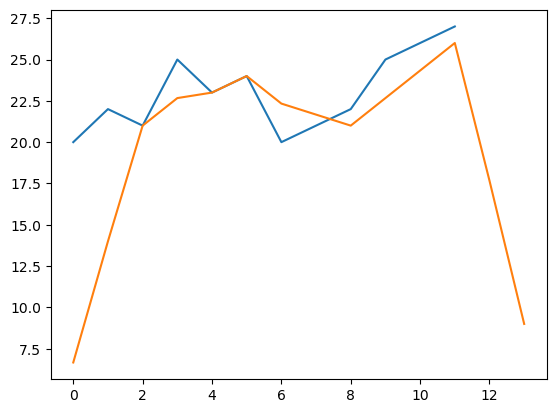

In [22]:
# Signal
my_signal = np.array([20, 22, 21, 25, 23, 24, 20, 21, 22, 25, 26, 27])

# Moving average filter
my_filter = np.array([1/3, 1/3, 1/3])

# Result array
y = np.zeros(my_signal.shape[0] + my_filter.shape[0] - 1)

# Perform the convolution 
convTimeInvariant(my_signal, my_filter, y, add = False)

plt.plot(my_signal)
plt.plot(y )
plt.show()

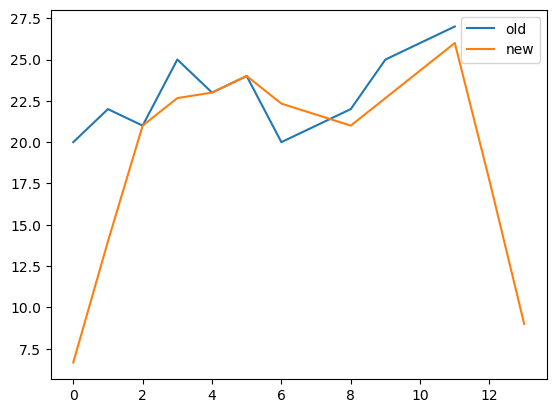

In [29]:
# Signal
my_signal = np.array([20, 22, 21, 25, 23, 24, 20, 21, 22, 25, 26, 27])

# Moving average filter
my_filter = np.array([1/3, 1/3, 1/3])

# Result array
y = np.zeros(my_signal.shape[0] + my_filter.shape[0] - 1)

# Perform the convolution 
convTimeInvariant(my_signal, my_filter, y, add = False)

plt.plot(my_signal)
plt.plot(y)
plt.legend(['old', 'new'])
plt.show()

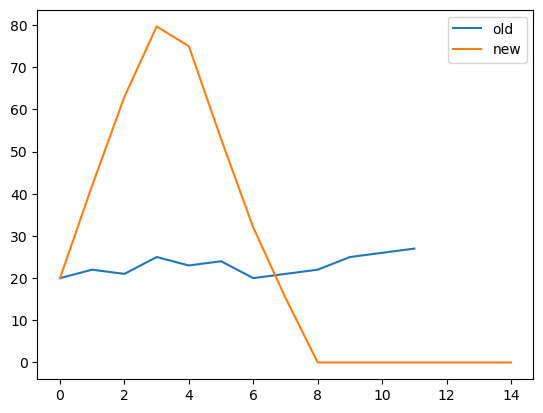

In [30]:
# Signal
my_signal = np.array([20, 22, 21, 25, 23, 24, 20, 21, 22, 25, 26, 27])

# Moving average filter
# my_filter = np.array([[1/3, 1/3, 1/3], [1, 0, 0], [0, 1, 0], [0, 0, 1]])
my_filter = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
my_filterT = np.array([0, 3, 5, 12])

# Result array
y = np.zeros(my_signal.shape[0] + my_filter.shape[0] - 1)

# Perform the convolution 
convTimeVariant(my_signal, my_filter, my_filterT, y, add = False)

plt.plot(my_signal)
plt.plot(y)
plt.legend(['old', 'new'])
plt.show()
